In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Carregando os dados do ENEM 2022
enem_2022 = pd.read_csv("MICRODADOS_ENEM_2022.csv", sep=';', encoding = "latin-1")


In [3]:
enem_2022.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [4]:
# Selecionando as variáveis de interesse
colunas_interesse = ['NU_INSCRICAO', 'TP_SEXO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006']
enem_filtrado = enem_2022.loc[:, colunas_interesse]

# Tratamento de dados faltantes
enem_filtrado = enem_filtrado.dropna()  
# Estatísticas descritivas para variáveis numéricas
descricao_numericas = enem_filtrado[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].describe()

# Estatísticas descritivas para variáveis categóricas
descricao_categoricas = enem_filtrado[['TP_SEXO', 'Q001', 'Q002', 'Q006']].describe(include='object')

In [5]:
enem_filtrado.head(10)

,NU_INSCRICAO,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006
2,210057280536,F,421.1,546.0,498.8,565.3,760.0,E,F,B
3,210055724397,M,490.7,388.6,357.8,416.0,320.0,C,A,A
7,210055778089,F,398.1,427.3,400.2,404.9,440.0,E,E,B
9,210055461467,F,467.5,461.0,466.7,435.3,360.0,E,E,B
11,210054972570,F,458.7,539.8,488.2,456.8,940.0,E,E,B
17,210056065100,F,396.8,528.7,551.4,536.0,640.0,G,F,B
18,210057551883,F,481.4,603.6,589.0,695.0,860.0,B,F,B
20,210055739197,F,466.5,476.2,488.3,462.7,0.0,H,E,B
22,210056235859,F,493.8,498.2,527.0,343.0,640.0,B,D,B
23,210057706656,M,476.0,559.2,607.3,625.4,760.0,E,E,E


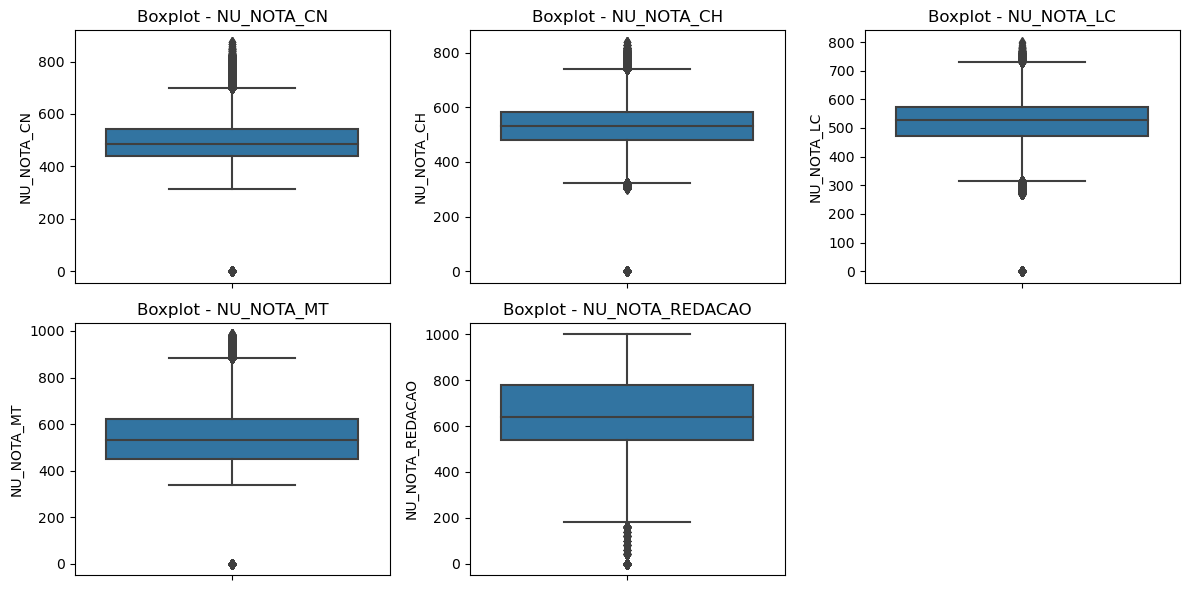

In [6]:
# Análise exploratória
# Gráficos de boxplot para variáveis numéricas
plt.figure(figsize=(12, 6))
for i, col in enumerate(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=enem_filtrado[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()


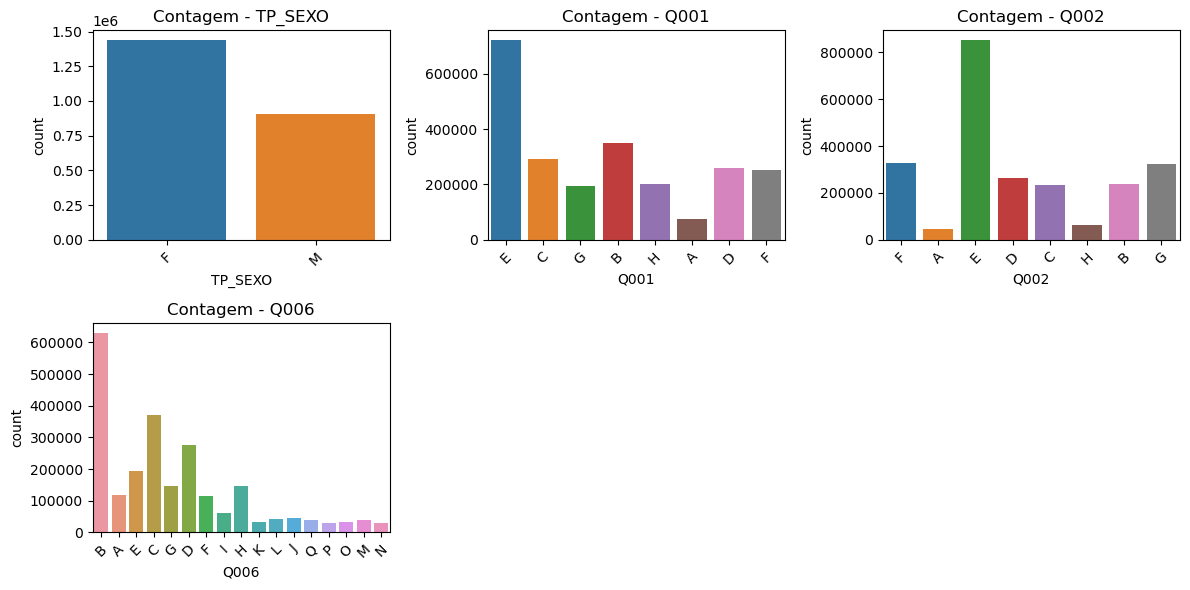

In [7]:
# Gráficos de contagem para variáveis categóricas
plt.figure(figsize=(12, 6))
for i, col in enumerate(['TP_SEXO', 'Q001', 'Q002', 'Q006']):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=enem_filtrado[col])
    plt.title(f'Contagem - {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Tratamento de dados faltantes
enem_filtrado = enem_filtrado.dropna()

# Modelagem
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_SEXO', 'Q001', 'Q002', 'Q006']
target = 'NU_NOTA_MT'

X = enem_filtrado[features]
y = enem_filtrado[target]

# Convertendo variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
print(f"Erro quadrático médio (MSE) do modelo de Regressão Linear: {mse_lr}")


Erro quadrático médio (MSE) do modelo de Regressão Linear: 6260.456164753519


In [14]:
# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f"Erro quadrático médio (MSE) do modelo de Random Forest: {mse_rf}")


Erro quadrático médio (MSE) do modelo de Random Forest: 6104.489546321556
